In [171]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flight.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
dataframe.columns[dataframe.isna().any()]

Index(['Arrival Delay in Minutes'], dtype='object')

In [173]:
dataframe["Arrival Delay in Minutes"]=dataframe["Arrival Delay in Minutes"].fillna(dataframe["Arrival Delay in Minutes"].mean())
#drop useless columns
dataframe=dataframe.drop('id',1)
dataframe=dataframe.drop('index',1)

## **Q1:EDA**

**Non-numerical values**

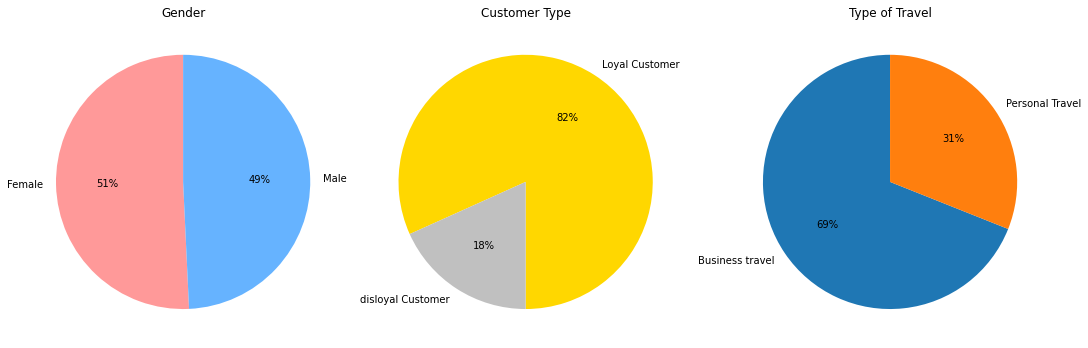

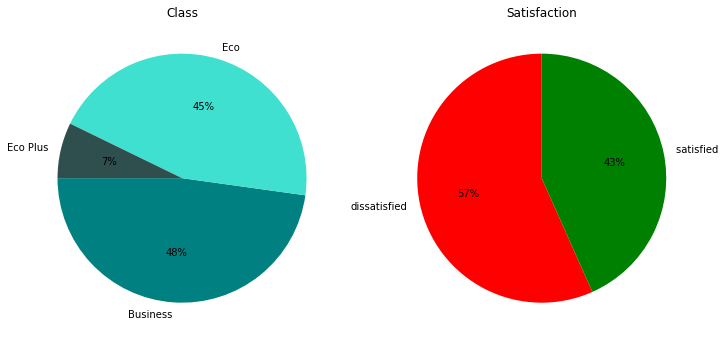

In [ ]:
# create subplot 1
f, (ax1, ax2,ax3) = plt.subplots(1, 3,constrained_layout=True,figsize=(15, 10))

# pie chart for gender
y=dataframe.Gender.value_counts(normalize=True)
ax1.set_title("Gender")
ax1.pie(y,labels=['Female','Male'],startangle = 90,colors = ['#ff9999','#66b3ff'],autopct='%1.0f%%')

#piechart for Customer Type
ax2.set_title("Customer Type")
y=dataframe['Customer Type'].value_counts(normalize=True)
ax2.pie(y,labels=['Loyal Customer','disloyal Customer'],startangle = 270,autopct='%1.0f%%',colors=["gold","silver"])

#piechart for Type of Travel
ax3.set_title("Type of Travel")
ax3.pie(dataframe['Type of Travel'].value_counts(normalize=True),labels=['Business travel','Personal Travel'],startangle = 90,autopct='%1.0f%%');

# create subplot 2
f, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True,figsize=(10, 7))
##piechart for Type of Class
ax1.set_title("Class")
class_colors=["teal","turquoise","darkslategrey"]
ax1.pie(dataframe['Class'].value_counts(normalize=True),labels=['Business','Eco','Eco Plus'],startangle = 180,autopct='%1.0f%%',colors=class_colors)
#Pie chart for satisfaction
ax2.set_title("Satisfaction")
ax2.pie(dataframe['satisfaction'].value_counts(normalize=True),labels=['dissatisfied','satisfied '],colors=["red","green"],startangle = 90,autopct='%1.0f%%');

**Numerical values**

Age


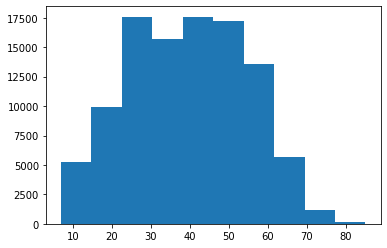

In [ ]:
#plot for Age
print("Age")
plt.hist(dataframe.Age)
# plt.set_title("Age")
plt.show()

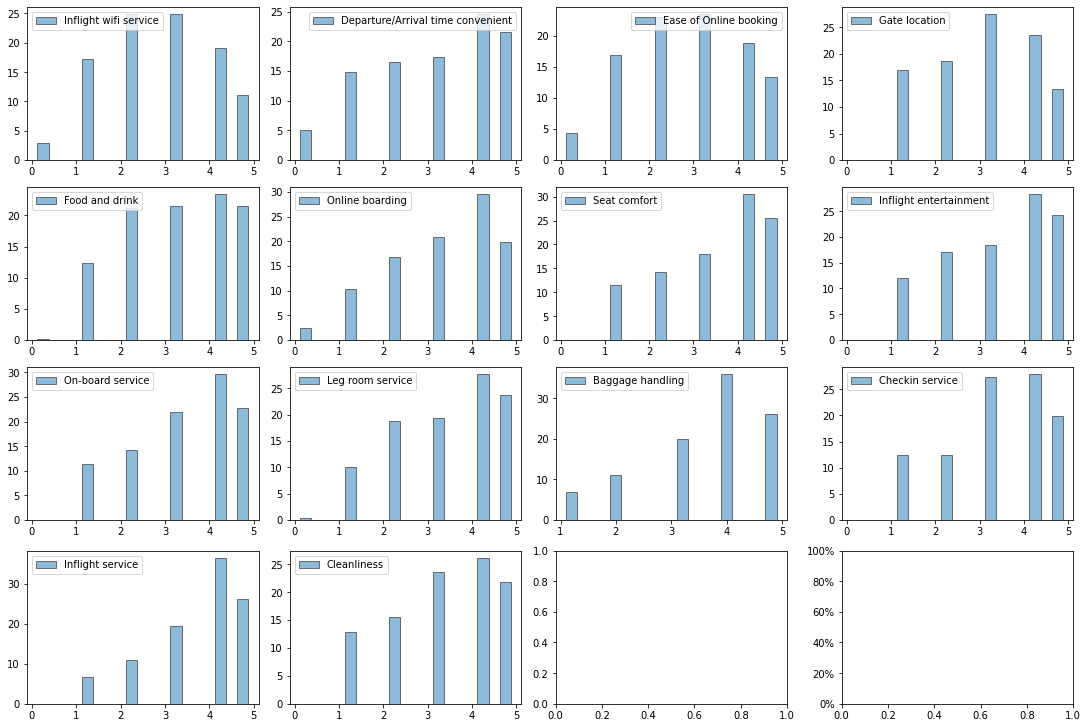

In [ ]:
from matplotlib.ticker import PercentFormatter
# # create subplot 
f, ((ax1, ax2,ax3,ax4),(ax5, ax6,ax7,ax8),(ax9, ax10,ax11,ax12),(ax13, ax14,ax15,ax16)) = plt.subplots(4, 4,constrained_layout=True,figsize=(15, 10))
i=1
cols=dataframe.columns[6:20]
for col in cols:
  data=dataframe[col]
  ax=globals()['ax'+str(i)]
  ax.hist(data,alpha=0.5, histtype='bar', ec='black',rwidth=0.5, weights=np.ones(len(data)) / len(data)*100)
  ax.legend([col,"percent"])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  i=i+1
  if i>16:
    break

In [ ]:
plt.hist(dataframe["Departure Delay in Minutes"],alpha=0.5, histtype='bar', ec='black',rwidth=0.5, weights=np.ones(len(data)) / len(data)*100)
# ,height=5, aspect=1.9,stat="percent",kind="hist"

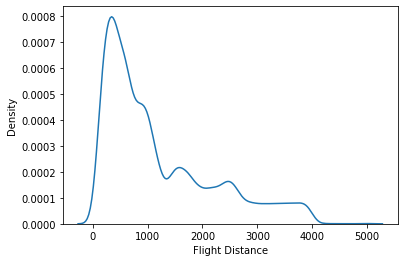

In [ ]:
sns.kdeplot(data=dataframe,x=dataframe["Flight Distance"]);

# **Q2**

   ## **2.1 Preproccessing**

### **Data cleaning**

In [174]:
#missing values
# dataframe.isna()
dataframe=dataframe.dropna()
#didn't find anything

In [ ]:
# data=dataframe
# data.loc[(data['Gender'] != 'Female') & (data['Gender'] != 'Male')]

In [ ]:
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

### **Categorical Encoding**

In [175]:
from sklearn.preprocessing import LabelEncoder# creating initial dataframe
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
categorical_columns=["Gender","Customer Type","Type of Travel","Class","satisfaction"]   
for i in categorical_columns:   
  # dataframe[i]=dataframe[i].astype('category')  
  dataframe[i] = labelencoder.fit_transform(dataframe[i])

In [ ]:

plt.scatter(dataframe["Flight Distance"], dataframe["Departure Delay in Minutes"])
plt.show()
plt.scatter(dataframe["Departure Delay in Minutes"], dataframe["Flight Distance"])
plt.show()

### **Handling outliers**

In [176]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

def replace_outliers(datacolumn,lowerbound,upperbound,median):
  datacolumn=datacolumn.mask(datacolumn>upperbound,median)
  datacolumn=datacolumn.mask(datacolumn<lowerbound,median)
  return datacolumn

outlier_columns=["Flight Distance"] #,"Arrival Delay in Minutes","Departure Delay in Minutes"
for i in outlier_columns:
  print(i,"sum",dataframe[i].sum())
  data_column=dataframe[i][:]
  median=data_column.median()
  lowerbound,upperbound = outlier_treatment(data_column)
  dataframe[i]=replace_outliers(data_column,lowerbound,upperbound,median)
  # print(i,"sum",dataframe[i].sum())

Flight Distance sum 123588444


### **Normlizing**

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit(dataframe.iloc[:,:-1]).transform(dataframe.iloc[:,:-1])
df_scaled_data = pd.DataFrame(scaled_data)
stasfied=dataframe.iloc[:,22]
df_scaled_data.reset_index(drop=True, inplace=True)
stasfied.reset_index(drop=True, inplace=True)
df_normal = pd.concat([df_scaled_data, stasfied], axis=1)
a=dataframe.columns.tolist()
df_normal=df_normal.set_axis(a, axis=1, inplace=False)
df_normal

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.015031,-0.472767,-1.745279,1.490614,2.264618,-0.726353,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.073014,0
1,1.015031,2.115208,-0.951360,-0.670865,-0.957054,-0.973100,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.237539,0
2,-0.985192,-0.472767,-0.885200,-0.670865,-0.957054,0.021566,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.392816,1
3,-0.985192,-0.472767,-0.951360,-0.670865,-0.957054,-0.614494,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.159901,0
4,1.015031,-0.472767,1.430397,-0.670865,-0.957054,-0.996130,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.392816,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.985192,2.115208,-1.083680,-0.670865,0.653782,-1.020257,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.392816,0
103900,1.015031,-0.472767,0.636478,-0.670865,-0.957054,1.343036,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.392816,1
103901,1.015031,2.115208,-0.620561,-0.670865,-0.957054,0.957013,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.030504,0
103902,-0.985192,2.115208,-1.149840,-0.670865,0.653782,-0.134159,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.392816,0


In [ ]:
# m=dataframe["Flight Distance"][:]
# print(m.min(),m.max())
# m=pd.cut(dataframe["Flight Distance"], bins=[0, 400, 500, 1000,2000],labels=[0, 40, 50, 100])
# print(m)

# **Q3**

## **Decision Tree Algoeithm**

## **Rain Foorest Algorithm**

## **Naive Bayes Algorithm**

**Guassian Naive Bayes**

create test and train data

In [183]:
from sklearn.model_selection import train_test_split
input_data = df_normal.iloc[:,:-1]
output_target=df_normal.iloc[:, 22]
X_train, X_test, y_train, y_test = train_test_split(input_data, output_target, test_size = 0.3, random_state=42)

train

In [211]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
Gmodel.fit(X_train,y_train)
Gmodel.score(X_train,y_train)

0.8656437331573448

test

In [213]:
G_predict=Gmodel.predict(X_test)

**Complement Naive Bayes**

create test and train data

In [244]:
input_data2 = dataframe.iloc[:,:-1]
output_target2=dataframe.iloc[:, 22]
X_train2, X_test2, y_train2, y_test2 = train_test_split(input_data2, output_target2, test_size = 0.3, random_state=42)

train

In [237]:
# from sklearn.naive_bayes import MultinomialNB
# Mmodel=MultinomialNB()
# Mmodel.fit(X_train2,y_train2)
# train_Mpred=Mmodel.predict(X_train2)
# test_Mpred=Mmodel.predict(X_test2)

In [245]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train2, y_train2)
clf.score(X_train2,y_train2)
# print(clf.predict(X[2:3]))

0.5977698949568278

test

In [246]:
Mmodel_predict=clf.predict(X_test2)
Mmodel_predict

array([0, 1, 1, ..., 1, 1, 1])

**Guassian Naive Bayes confussion matrix**

In [233]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Gmodel_result = confusion_matrix(y_test, G_predict)
print("Confusion Matrix:")
print(Gmodel_result)
Gmodel_result1 = classification_report(y_test, G_predict)
print("Classification Report:",)
print(Gmodel_result1)

Confusion Matrix:
[[15814  1741]
 [ 2458 11159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     17555
           1       0.87      0.82      0.84     13617

    accuracy                           0.87     31172
   macro avg       0.87      0.86      0.86     31172
weighted avg       0.87      0.87      0.86     31172



**ComplementNB confussion matrix**

In [247]:
Mmodel_predict_result = confusion_matrix(y_test2, Mmodel_predict)
print("Confusion Matrix:")
print(Mmodel_predict_result)
Mmodel_predict_result1 = classification_report(y_test2, Mmodel_predict)
print("Classification Report:",)
print(Mmodel_predict_result1)

Confusion Matrix:
[[10571  7129]
 [ 5421  8051]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63     17700
           1       0.53      0.60      0.56     13472

    accuracy                           0.60     31172
   macro avg       0.60      0.60      0.59     31172
weighted avg       0.60      0.60      0.60     31172

